In [146]:
import numpy as np
import random
import numpy.random
import matplotlib.pyplot as plt

# EXERCISE 2.5

steps = 10000
runs = 2000

"""
returns data in the format

{
    "rewards": np.array([1.5, .2, ...]),
    "optimal": np.array([1, 0, ...])
}
""" 
def ten_armed_bandit(sample_average = False):
    q = np.zeros(10)
    Q = np.zeros(10)
    
    rewards = []
    optimal = []

    for i in range(steps):
        arg_max_reward = None
        arg_max_actions = []
        
        for j in range(len(Q)):
            estimated_reward = Q[j]
            
            if arg_max_reward == None or estimated_reward > arg_max_reward:
                arg_max_reward = estimated_reward
                arg_max_actions = [j]
                
            elif estimated_reward == arg_max_reward:
                arg_max_actions.append(j)
        
        if random.uniform(0, 1) < .1:
            selected_action = random.choice(range(10))
        else:
            selected_action = random.choice(arg_max_actions)
            
        actual_reward = q[selected_action]
        alpha = 1/(i + 1) if sample_average else .1
        Q[selected_action] = Q[selected_action] + alpha * (actual_reward - Q[selected_action])
        
        was_action_optimal = 1 if actual_reward == max(q) else 0
            
        rewards.append(actual_reward)
        optimal.append(was_action_optimal)
        
        random_walk_values = np.random.normal(0, .01, len(q))
        
        for j in range(len(q)):
            q[j] = q[j] + random_walk_values[j]
                 
    return {
        "rewards": np.array(rewards),
        "optimal": np.array(optimal)
    }


def average_bandit_results(sample_average = False):
    rewards = np.zeros(steps)
    optimal = np.zeros(steps)
    
    for i in range(runs):
        results = ten_armed_bandit(sample_average)
        rewards = rewards + (results["rewards"] / runs)
        optimal = optimal + (results["optimal"] / runs)    
    
    return {
        "rewards": rewards,
        "optimal": optimal
    }

def plot_average_rewards(with_sample_average, without_sample_average):
    plt.plot(with_sample_average, "r--", label = "sample average")
    plt.plot(without_sample_average, "g", label = "constant")
    plt.xlabel("steps")
    plt.ylabel("average reward")
    plt.legend()
    plt.show()
    
def plot_average_optimality(with_sample_average, without_sample_average):
    plt.plot(with_sample_average, "r--", label = "sample average")
    plt.plot(without_sample_average, "g", label = "constant")
    plt.xlabel("steps")
    plt.ylabel("percent optimal")
    plt.legend()
    plt.show()

In [78]:
%matplotlib inline

In [147]:
with_sample_average = average_bandit_results(True)

In [148]:
without_sample_average = average_bandit_results()

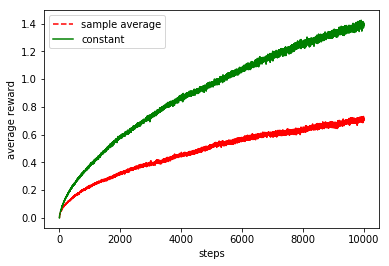

In [149]:
plot_average_rewards(with_sample_average["rewards"], without_sample_average["rewards"])

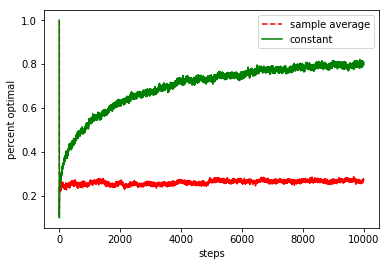

In [150]:
plot_average_optimality(with_sample_average["optimal"], without_sample_average["optimal"])